## Logic Based FizzBuzz Function [Software 1.0]

In [16]:
#ubitname : smalate #person number - 50289133
import pandas as pd  
#Pandas is a software library written for the python programming language for data manipulation and analysis.

def fizzbuzz(n):
    
    # Logic Explanation
    if n % 3 == 0 and n % 5 == 0:  #If number is divisible by 3 and 5 print fizzbuzz
        return 'fizzbuzz'
    elif n % 3 == 0:    #If number is divisible by 3 print fizz
        return 'fizz'
    elif n % 5 == 0:  #If number is divisible by 5 print buzz
        return 'buzz'
    else:
        return 'other' #If none of the above condition is true print other

## Create Training and Testing Datasets in CSV Format

In [17]:
def createInputCSV(start,end,filename):
    
    # Why list in Python?
    #Ans- List are ordered set of elements and can have items of different types and also allows duplication of values.
    # In this project the input list will hold the numbers of int type and output list are string type. So list is used   
    
    inputData   = []
    outputData  = []
    
    # Why do we need training Data?
    #Ans- To train the model we need training data. Algorithms find relation, develop understanding 
    #from the training data and make decisions. Better the training data , better is the model performance.  
    
    for i in range(start,end): #Training csv - (start = 101 end=1001) Testing CSV(start=1, end=100)
        inputData.append(i)
        outputData.append(fizzbuzz(i))
    
    # Why Dataframe?
    #Ans- A Data frame is a two-dimensional data structure, i.e., data is aligned in a tabular fashion in rows and columns.
    # Can perform arithmetic operations on rows and columns. Rows and columns are labelled.

    dataset = {}       #Key value Pair - Dictionary
    dataset["input"]  = inputData   #Creating 2 columns(input,label) in csv file 
    dataset["label"] = outputData
    
    # Writing to csv
    pd.DataFrame(dataset).to_csv(filename) 
    
    print(filename, "Created!")

## Processing Input and Label Data

In [18]:
def processData(dataset):
    
    # Why do we have to process?
    #Ans- Data is in raw format and and is not feasible for analysis. Hence we need to process the data.
    #Processing in this case is converting decimal into 10bit binary.
    
    data   = dataset['input'].values
    labels = dataset['label'].values
    
    processedData  = encodeData(data) 
    processedLabel = encodeLabel(labels)
    
    return processedData, processedLabel

In [19]:
def encodeData(data):
    
    processedData = []
    
    for dataInstance in data:
        
       # Why do we have number 10? 
       #Ans-Convert the decimal number to 10 bit binary because if we take number in decimal format it will be
       # Considered as 1 feature,i.e one input neuron connected to the hidden layer. But coverting it into 10 bit binary 
       # Will be considered as 10 feature i.e 10 input neurons connected to each neuron in the hidden layer.
       # We are using numbers 1-1001 and to represent these numbers 10 bit is required 
        
        processedData.append([dataInstance >> d & 1 for d in range(10)])
    
    return np.array(processedData)

In [20]:
from keras.utils import np_utils    #keras is an open source neural network library written in Python

def encodeLabel(labels):
    
    processedLabel = []
    
    #creating bucket of 4 labels
    for labelInstance in labels:
        if(labelInstance == "fizzbuzz"):
            # Fizzbuzz
            processedLabel.append([3])
        elif(labelInstance == "fizz"):
            # Fizz
            processedLabel.append([1])
        elif(labelInstance == "buzz"):
            # Buzz
            processedLabel.append([2])
        else:
            # Other
            processedLabel.append([0])

    return np_utils.to_categorical(np.array(processedLabel),4)
    # Eg
    # [0,0,0,1] - fizz
    # [0,0,1,0] - buzz
    # [0,1,0,0] - fizzbuzz
    # [1,0,0,0] - other

Using TensorFlow backend.


## Model Definition

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, TensorBoard
from keras.layers.advanced_activations import LeakyReLU

import numpy as np

input_size = 10            # 10 input neurons
drop_out = 0.1             # 10% of the neurons from layer 2 will be eliminated.
first_dense_layer_nodes  = 512  
second_dense_layer_nodes = 4    #layer with 4 neurons

def get_model():
    
    # Why do we need a model?
    # Ans- We need a model to make the predictions on testing data. Machine learning model is created by training process.
    
    
    # Why use Dense layer and then activation?
    # Ans- Dense layer connects each input to each output neurons. Activation function is used to predict the output and maps
    # it to appropriate label.
    
    
    # Why use sequential model with layers? 
    # Ans- Sequential model connects each neuron with every other neuron in next layer. (linear stack of layer) 
    # More the dense network better predictions can be made.
    
    
    model = Sequential()
    
    model.add(Dense(first_dense_layer_nodes, input_dim=input_size))
    model.add(Activation('relu'))
    #model.add(Activation('tanh'))
    #model.add(LeakyReLU(alpha=0.1))
    
    # Why dropout?
    #Ans - Dropouts are the number of nodes from 2nd layer that are to be eliminated to avoid overfitting.
    #In this case we are taking dropout as 0.1 which means 10% of the nodes from 2nd layer will be eliminated.
    
    model.add(Dropout(drop_out))
    
    model.add(Dense(second_dense_layer_nodes))
    model.add(Activation('softmax'))
    
    # Why Softmax? 
    #Ans- Softmax is a multi label classification activation function and since we have 4 labels(fizz,buzz,fizz-buzz, other)
    #in project we are using softmax activation function.For binary classification like 1 or 0 we can use sigmoid activation
    #function.
    
    model.summary() # Prints summary representation of model
    
    # Why use categorical_crossentropy? 
    #Ans - Categorical_crossentropy is a loss function. Loss function measures the inconsistency between predicted label and actual label
    #To measure this inconsistency we are using the categorical_crossentropy and we have 4 label so we are using categorical_crossentropy.
    #Otherwise for 2 label binary_crossentropy would have been used.
        
    
    #Compile defines the loss function, the optimizer and the metrics
    model.compile(optimizer='rmsprop',          #adam   #SGD  
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# <font color='blue'>Creating Training and Testing Datafiles</font>

In [22]:
# Create datafiles
createInputCSV(101,1001,'training.csv')
createInputCSV(1,101,'testing.csv')

training.csv Created!
testing.csv Created!


# <font color='blue'>Creating Model</font>

In [23]:
model = get_model()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               5632      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 2052      
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 7,684
Trainable params: 7,684
Non-trainable params: 0
_________________________________________________________________


# <font color = blue>Run Model</font>

In [24]:
validation_data_split = 0.2 # validation_data_split splits the training set into training data and validation data
num_epochs = 10000               #400000
model_batch_size = 128            #64
tb_batch_size = 32                
early_patience = 100

tensorboard_cb   = TensorBoard(log_dir='logs', batch_size= tb_batch_size, write_graph= True)
earlystopping_cb = EarlyStopping(monitor='val_loss', verbose=1, patience=early_patience, mode='min')

# Read Dataset
dataset = pd.read_csv('training.csv')

# Process Dataset
processedData, processedLabel = processData(dataset)
history = model.fit(processedData
                    , processedLabel
                    , validation_split=validation_data_split
                    , epochs=num_epochs
                    , batch_size=model_batch_size
                    , callbacks = [tensorboard_cb,earlystopping_cb]
                   )

Train on 720 samples, validate on 180 samples
Epoch 1/10000
720/720 [==============================] - 0s 576us/step - loss: 1.2771 - acc: 0.4528 - val_loss: 1.1640 - val_acc: 0.5333
Epoch 2/10000
720/720 [==============================] - 0s 35us/step - loss: 1.1640 - acc: 0.5333 - val_loss: 1.1507 - val_acc: 0.5333
Epoch 3/10000
720/720 [==============================] - 0s 42us/step - loss: 1.1545 - acc: 0.5333 - val_loss: 1.1466 - val_acc: 0.5333
Epoch 4/10000
720/720 [==============================] - 0s 51us/step - loss: 1.1523 - acc: 0.5333 - val_loss: 1.1493 - val_acc: 0.5333
Epoch 5/10000
720/720 [==============================] - 0s 48us/step - loss: 1.1456 - acc: 0.5333 - val_loss: 1.1468 - val_acc: 0.5333
Epoch 6/10000
720/720 [==============================] - 0s 56us/step - loss: 1.1441 - acc: 0.5333 - val_loss: 1.1465 - val_acc: 0.5333
Epoch 7/10000
720/720 [==============================] - 0s 51us/step - loss: 1.1416 - acc: 0.5333 - val_loss: 1.1482 - val_acc: 0.5333
E

Epoch 120/10000
720/720 [==============================] - 0s 36us/step - loss: 0.7578 - acc: 0.6931 - val_loss: 0.9812 - val_acc: 0.6111
Epoch 121/10000
720/720 [==============================] - 0s 37us/step - loss: 0.7520 - acc: 0.7111 - val_loss: 0.9619 - val_acc: 0.5611
Epoch 122/10000
720/720 [==============================] - 0s 35us/step - loss: 0.7363 - acc: 0.7111 - val_loss: 0.9654 - val_acc: 0.5944
Epoch 123/10000
720/720 [==============================] - 0s 16us/step - loss: 0.7424 - acc: 0.6903 - val_loss: 0.9585 - val_acc: 0.5889
Epoch 124/10000
720/720 [==============================] - 0s 12us/step - loss: 0.7339 - acc: 0.6944 - val_loss: 0.9542 - val_acc: 0.5667
Epoch 125/10000
720/720 [==============================] - 0s 28us/step - loss: 0.7292 - acc: 0.7042 - val_loss: 0.9549 - val_acc: 0.5833
Epoch 126/10000
720/720 [==============================] - 0s 35us/step - loss: 0.7285 - acc: 0.7125 - val_loss: 0.9490 - val_acc: 0.5833
Epoch 127/10000
720/720 [=========

720/720 [==============================] - 0s 30us/step - loss: 0.5436 - acc: 0.8375 - val_loss: 0.8308 - val_acc: 0.7611
Epoch 180/10000
720/720 [==============================] - 0s 30us/step - loss: 0.5503 - acc: 0.8681 - val_loss: 0.8184 - val_acc: 0.6833
Epoch 181/10000
720/720 [==============================] - 0s 37us/step - loss: 0.5369 - acc: 0.8472 - val_loss: 0.8261 - val_acc: 0.6556
Epoch 182/10000
720/720 [==============================] - 0s 48us/step - loss: 0.5382 - acc: 0.8375 - val_loss: 0.8138 - val_acc: 0.7333
Epoch 183/10000
720/720 [==============================] - 0s 51us/step - loss: 0.5363 - acc: 0.8542 - val_loss: 0.8118 - val_acc: 0.7500
Epoch 184/10000
720/720 [==============================] - 0s 52us/step - loss: 0.5340 - acc: 0.8667 - val_loss: 0.7982 - val_acc: 0.7333
Epoch 185/10000
720/720 [==============================] - 0s 25us/step - loss: 0.5207 - acc: 0.8653 - val_loss: 0.8050 - val_acc: 0.7500
Epoch 186/10000
720/720 [=========================

Epoch 238/10000
720/720 [==============================] - 0s 33us/step - loss: 0.3988 - acc: 0.9125 - val_loss: 0.6818 - val_acc: 0.7944
Epoch 239/10000
720/720 [==============================] - 0s 32us/step - loss: 0.3982 - acc: 0.9208 - val_loss: 0.6816 - val_acc: 0.7889
Epoch 240/10000
720/720 [==============================] - 0s 38us/step - loss: 0.3777 - acc: 0.9236 - val_loss: 0.6760 - val_acc: 0.8056
Epoch 241/10000
720/720 [==============================] - 0s 46us/step - loss: 0.3850 - acc: 0.9194 - val_loss: 0.6722 - val_acc: 0.8222
Epoch 242/10000
720/720 [==============================] - 0s 44us/step - loss: 0.3704 - acc: 0.9347 - val_loss: 0.6759 - val_acc: 0.8222
Epoch 243/10000
720/720 [==============================] - 0s 50us/step - loss: 0.3897 - acc: 0.9097 - val_loss: 0.7061 - val_acc: 0.7889
Epoch 244/10000
720/720 [==============================] - 0s 45us/step - loss: 0.3828 - acc: 0.9236 - val_loss: 0.6708 - val_acc: 0.8111
Epoch 245/10000
720/720 [=========

Epoch 297/10000
720/720 [==============================] - 0s 29us/step - loss: 0.2804 - acc: 0.9514 - val_loss: 0.5844 - val_acc: 0.8556
Epoch 298/10000
720/720 [==============================] - 0s 34us/step - loss: 0.2885 - acc: 0.9403 - val_loss: 0.5951 - val_acc: 0.8056
Epoch 299/10000
720/720 [==============================] - 0s 44us/step - loss: 0.2760 - acc: 0.9500 - val_loss: 0.5847 - val_acc: 0.8389
Epoch 300/10000
720/720 [==============================] - 0s 48us/step - loss: 0.2777 - acc: 0.9542 - val_loss: 0.5717 - val_acc: 0.8722
Epoch 301/10000
720/720 [==============================] - 0s 46us/step - loss: 0.2846 - acc: 0.9431 - val_loss: 0.5827 - val_acc: 0.8167
Epoch 302/10000
720/720 [==============================] - 0s 37us/step - loss: 0.2709 - acc: 0.9486 - val_loss: 0.5717 - val_acc: 0.8500
Epoch 303/10000
720/720 [==============================] - 0s 35us/step - loss: 0.2759 - acc: 0.9542 - val_loss: 0.5960 - val_acc: 0.8111
Epoch 304/10000
720/720 [=========

Epoch 356/10000
720/720 [==============================] - 0s 30us/step - loss: 0.2104 - acc: 0.9694 - val_loss: 0.5150 - val_acc: 0.8667
Epoch 357/10000
720/720 [==============================] - 0s 36us/step - loss: 0.2060 - acc: 0.9708 - val_loss: 0.5410 - val_acc: 0.8111
Epoch 358/10000
720/720 [==============================] - 0s 35us/step - loss: 0.2149 - acc: 0.9625 - val_loss: 0.5038 - val_acc: 0.8778
Epoch 359/10000
720/720 [==============================] - 0s 55us/step - loss: 0.2126 - acc: 0.9653 - val_loss: 0.4947 - val_acc: 0.8833
Epoch 360/10000
720/720 [==============================] - 0s 55us/step - loss: 0.2125 - acc: 0.9694 - val_loss: 0.5050 - val_acc: 0.8444
Epoch 361/10000
720/720 [==============================] - 0s 56us/step - loss: 0.2125 - acc: 0.9694 - val_loss: 0.5052 - val_acc: 0.8611
Epoch 362/10000
720/720 [==============================] - 0s 36us/step - loss: 0.2159 - acc: 0.9569 - val_loss: 0.5031 - val_acc: 0.8778
Epoch 363/10000
720/720 [=========

Epoch 415/10000
720/720 [==============================] - 0s 26us/step - loss: 0.1661 - acc: 0.9625 - val_loss: 0.4564 - val_acc: 0.8833
Epoch 416/10000
720/720 [==============================] - 0s 34us/step - loss: 0.1707 - acc: 0.9681 - val_loss: 0.4687 - val_acc: 0.8500
Epoch 417/10000
720/720 [==============================] - 0s 47us/step - loss: 0.1612 - acc: 0.9681 - val_loss: 0.4731 - val_acc: 0.8611
Epoch 418/10000
720/720 [==============================] - 0s 46us/step - loss: 0.1514 - acc: 0.9806 - val_loss: 0.4608 - val_acc: 0.8889
Epoch 419/10000
720/720 [==============================] - 0s 48us/step - loss: 0.1575 - acc: 0.9833 - val_loss: 0.4811 - val_acc: 0.8667
Epoch 420/10000
720/720 [==============================] - 0s 47us/step - loss: 0.1657 - acc: 0.9736 - val_loss: 0.4575 - val_acc: 0.9056
Epoch 421/10000
720/720 [==============================] - 0s 52us/step - loss: 0.1600 - acc: 0.9806 - val_loss: 0.4708 - val_acc: 0.8500
Epoch 422/10000
720/720 [=========

720/720 [==============================] - 0s 22us/step - loss: 0.1087 - acc: 0.9806 - val_loss: 0.3749 - val_acc: 0.9222
Epoch 534/10000
720/720 [==============================] - 0s 31us/step - loss: 0.1111 - acc: 0.9764 - val_loss: 0.3991 - val_acc: 0.9167
Epoch 535/10000
720/720 [==============================] - 0s 39us/step - loss: 0.1207 - acc: 0.9708 - val_loss: 0.4061 - val_acc: 0.8944
Epoch 536/10000
720/720 [==============================] - 0s 29us/step - loss: 0.1079 - acc: 0.9847 - val_loss: 0.4110 - val_acc: 0.8778
Epoch 537/10000
720/720 [==============================] - 0s 34us/step - loss: 0.1140 - acc: 0.9764 - val_loss: 0.4003 - val_acc: 0.8944
Epoch 538/10000
720/720 [==============================] - 0s 31us/step - loss: 0.1013 - acc: 0.9903 - val_loss: 0.3787 - val_acc: 0.9056
Epoch 539/10000
720/720 [==============================] - 0s 42us/step - loss: 0.1059 - acc: 0.9833 - val_loss: 0.3979 - val_acc: 0.8889
Epoch 540/10000
720/720 [=========================

720/720 [==============================] - 0s 35us/step - loss: 0.0866 - acc: 0.9806 - val_loss: 0.3551 - val_acc: 0.9222
Epoch 652/10000
720/720 [==============================] - 0s 21us/step - loss: 0.0776 - acc: 0.9833 - val_loss: 0.3698 - val_acc: 0.9222
Epoch 653/10000
720/720 [==============================] - 0s 48us/step - loss: 0.0736 - acc: 0.9875 - val_loss: 0.3479 - val_acc: 0.9278
Epoch 654/10000
720/720 [==============================] - 0s 35us/step - loss: 0.0840 - acc: 0.9847 - val_loss: 0.4074 - val_acc: 0.8833
Epoch 655/10000
720/720 [==============================] - 0s 34us/step - loss: 0.0774 - acc: 0.9833 - val_loss: 0.3904 - val_acc: 0.8944
Epoch 656/10000
720/720 [==============================] - 0s 38us/step - loss: 0.0866 - acc: 0.9861 - val_loss: 0.3518 - val_acc: 0.9333
Epoch 657/10000
720/720 [==============================] - 0s 58us/step - loss: 0.0817 - acc: 0.9917 - val_loss: 0.3834 - val_acc: 0.9167
Epoch 658/10000
720/720 [=========================

720/720 [==============================] - 0s 33us/step - loss: 0.0588 - acc: 0.9931 - val_loss: 0.3985 - val_acc: 0.8833
Epoch 770/10000
720/720 [==============================] - 0s 33us/step - loss: 0.0560 - acc: 0.9944 - val_loss: 0.3650 - val_acc: 0.9222
Epoch 771/10000
720/720 [==============================] - 0s 26us/step - loss: 0.0677 - acc: 0.9903 - val_loss: 0.4461 - val_acc: 0.8611
Epoch 772/10000
720/720 [==============================] - 0s 20us/step - loss: 0.0614 - acc: 0.9931 - val_loss: 0.3749 - val_acc: 0.9222
Epoch 773/10000
720/720 [==============================] - 0s 47us/step - loss: 0.0599 - acc: 0.9931 - val_loss: 0.4467 - val_acc: 0.8556
Epoch 774/10000
720/720 [==============================] - 0s 39us/step - loss: 0.0535 - acc: 0.9944 - val_loss: 0.3415 - val_acc: 0.9500
Epoch 775/10000
720/720 [==============================] - 0s 47us/step - loss: 0.0616 - acc: 0.9889 - val_loss: 0.4622 - val_acc: 0.8500
Epoch 776/10000
720/720 [=========================

# <font color = blue>Training and Validation Graphs</font>

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DEAA663D68>,
      dtype=object)

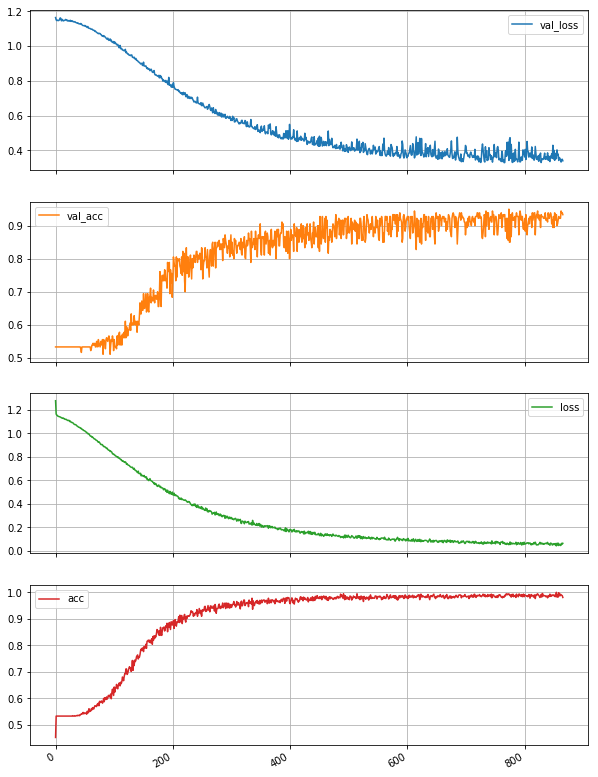

In [25]:
%matplotlib inline
df = pd.DataFrame(history.history)
df.plot(subplots=True, grid=True, figsize=(10,15))

# <font color = blue>Testing Accuracy [Software 2.0]</font>

In [26]:
def decodeLabel(encodedLabel):
    if encodedLabel == 0:
        return "other"
    elif encodedLabel == 1:
        return "fizz"
    elif encodedLabel == 2:
        return "buzz"
    elif encodedLabel == 3:
        return "fizzbuzz"

In [27]:
wrong   = 0
right   = 0

testData = pd.read_csv('testing.csv')

processedTestData  = encodeData(testData['input'].values)
processedTestLabel = encodeLabel(testData['label'].values)
predictedTestLabel = []

for i,j in zip(processedTestData,processedTestLabel):
    y = model.predict(np.array(i).reshape(-1,10))          #predict the hot-vector array
    predictedTestLabel.append(decodeLabel(y.argmax()))
    
    if j.argmax() == y.argmax():
        right = right + 1
    else:
        wrong = wrong + 1

print("Errors: " + str(wrong), " Correct :" + str(right))

print("Testing Accuracy: " + str(right/(right+wrong)*100))

output = {}
output["input"] = testData['input']
output["label"] = testData['label']
output["predicted_label"] = predictedTestLabel

opdf = pd.DataFrame(output)
opdf.to_csv('output.csv')

Errors: 5  Correct :95
Testing Accuracy: 95.0


In [28]:
5


5